## 4. Regression: Optimization of Long-Term Correction of Wind Data Using Regression Models

**Assignment Description**

In this assignment, you will work with realistic data from the wind industry. Vestas, a leading global company in wind energy, is interested in optimizing their methods for generating long-term corrected (LTC) wind data, which are used for planning the locations of new wind farms.

**Context**

Before building a new wind farm, Vestas needs to get an estimate of how much power it can produce. This can be done by running a simulation of the planned wind farm. The primary factors that decide how much power will be produced are: 

-  the turbine type (bigger turbines generally produce more energy), 

- the locations of the turbines (more energy is produced if the turbines are placed so that they do not block each other significantly) and 

- the wind speed and wind direction at the location where the wind farm is planned to be build. 

The turbine type and location is something that Vestas engineers get to decide, but wind is not so easily managed... Therefore, it is important to have a large amount of data to get a precise description of the distribution of wind speeds and wind directions at the potential site. Ideally a wind measuring mast would be build at the place of interest and collect data on wind speeds and wind directions for 20 years or so prior to the wind farm being build. However, the investers would probably become impatient if they had to wait for 20 years before construction could begin. 

So instead, a mast is build that collects data for a few years (typically 1-4 years). To account for more "global" variations in wind from year to year (some years are simply more windy than other years), the data from the mast is then compared to the data based on wind models which covers a much longer time scale. This model data (referred to as "meso" data) can be obtained for any location on Earth, and accounts for large scale wind variations (e.g. due to seasons, geography, Coriolis effect etc.). But it cannot be expected to give a precise description of the wind at a specific location, which is also affected by vegetation, buildings, the local landscape and so on. So in summary, the mast data captures the specific wind conditions for the given site, and the meso data accounts for variations in wind speeds on a longer time scale. Together, the two datasets usually give a good description of the wind at a specific site over a long time period, and therefore can be used to predict the expected power production over a long time span (e.g. 20 years, comparable to the life time of a wind farm).

Below is an illustration comparing a meso and a mast time series. Note that this plot is only for illustration purposes. In reality, meso data typically has a frequency of 1 hour, and mast data has a frequency of 10 minutes. Besides, the figure only illustrates the variations in windspeeds. For the actual simulations, wind directions are also extremely important (e.g. to determine the locations of the turbines such that they don't block each other for the prevalent wind directions).

![Illustration of meso vs mast time series](timeseries_example.png)

In order to run a simulation for a given (potential) site, Vestas needs to obtain a single time series which has the same characteristics as the mast timeseries, but has a time span of 20 years like the meso time series. For this purpose, they currently use a neural network: They train the network on the overlapping parts of the mast and meso time series. Specifically, they train the network to be able to predict the mast wind speeds and wind directions based on the wind speeds and wind directions found in the meso data for the same time stamps. After the neural network has been trained, they feed the meso wind speeds and wind directions for the entire 20 years time span to get a *predicted* "mast" time series covering the 20 years of data found in the meso data. This *predicted* mast time series is called the "long term corrected" (LTC) time series, and is the one on which they base their simulations for the power production at the given site. 

However, traning neural networks is time consuming and expensive! Therefore, Vestas is curious if some kind of linear regression would be able to acheive comparable results. 

**Data**
 
You will have access to two types of time series data:

1) Mast time series data that represent the wind conditions at a specific location based on measurements from a wind measuring mast.

2) Meso time series data that are based on weather measurement models and cover more than 20 years. While these data are less precise and don't exactly match the specific location, they provide a longer historical context.

Note that the mast data for this project is significantly longer than "typical" mast data. This allows cutting the data into training and test sets (or training, validation and test sets). Each set should cover all four seasons.

Your task is to develop a model using regression techniques that can generate LTC wind data. This LTC time series should be long, like the meso time series, but also give an accurate description of the wind conditions at the specific location.

**Objectives and Purpose**
 
The purpose of the assignment is to assess whether regression could be used instead of neural networks, which could potentially save time and money as it is generally quicker to perform a regression than to train a neural network. And the main objective is thus to develop a regression model that can generate LTC time series that are both accurate and cost-effective.

**Requirements**

Please note. We have supplied some examples of how students have previously done the preprocessing to give you some input and thus make the work load a bit less. Feel free to use/reuse the preprocessing steps of these solutions.

1. **Data preprocessing:** You must handle large datasets and perform necessary data preprocessing tasks. This includes dealing with missing values, handling outliers, and scaling data appropriately for the chosen regression technique. Feel free to use or get inspired by previous solutions.

    a. Consider the appropriate intervals for wind speeds and wind directions. No negative wind speeds are allowed, and wind directions should be in an appropriate interval (e.g. [0; 360[ degrees).

    b. Select which ws / wd signals to use. Signals at higher altitude are generally better, but it is even more important to have proper coverage of all seasons.

    c. Find the meso-signals closest in height to the mast-data-signal you are using. Or interpolate the values between 2 or more meso-signals to get the values at the exact mast-signal-height.

    d. Convert the mast data from DK time to UTC time (corresponding to the time zone used in the meso data). Remember to account for summer-time in DK.
    
    e. Resample the mast dataset to have the same frequency as the meso data. The meso data has one record for each hour, the mast data has one record for each 10 min.

        i. Note: You should not convert the ws / wd signals to vector-quantities and use those for the resampling. Resample the ws and wd signal individually instead. The turbines “yaw” to always point toward the incoming wind, so the interesting value is the wind speed and not the wind velocity.  
        ii. Be careful when resampling the wind directions. You don’t want the average of 0 degrees and 359 degrees to become ~180 degrees :-)

    f. Find the overlapping timestamps between the meso data and the resampled mast data. You only want to consider data in this overlapping time period in your training.

2. **Optional: Exploratory analysis:** You may do an exploratory analysis of the data, but this part is not mandatory. This includes presenting the data in tables and graphs, study and describe features of interest, as well as correlation analysis. Wind speeds typically follow a Weibull-distributions. Try fitting a Weibull distribution to the mast data, the resampled mast data and the meso-data. **(You can skip this part if you want to)**
3. **Model Development:** Use appropriate machine learning principles and methodologies, including model training and testing and perhaps validation, cross-validation, and leave-one-out. You should apply and interpret regression models effectively for this task.
4. **Model Evaluation:** Evaluate the developed model using appropriate metrics such as Mean Squared Error (MSE), R-squared (R²), etc. The evaluation should give an indication of the usefulness of your model in predicting wind conditions accurately. 
**Optional**: If you did step 2 above, in addition to calculating the above metric for your predicted time series, also consider comparing the distributions of the wind speeds in the predicted and the actual (resampled) mast data. That is, calculate the Weibull A- and k-parameters for both distributions, and find the error in these between your fit and the true data. "Error-in-A" and "Error-in-k" are the most used quantities to evaluate the long term correction process in the wind industry :-)
5. **Documentation and Presentation:** Clearly document the steps, methodologies, and tools you used during the process. Present the results of your model in a clear and effective manner. This documentation should be comprehensive enough for someone to replicate your process and understand your results. Hand-in as one Jupyter Notebook.


**Some additional comments**

They (Vestas) have also tried running their own LTC algorithm on some of the data (they chose the 77m wind speed and wind direction signals from the Risø dataset), and this yielded good results. They assumed that the data was in Danish time, so they believe that is the case.

As you can see, there is quite a focus on wind speeds (as they determine the amount of power produced). However, they know that their neural network operates by training on the different components of wind speed separately (meaning training one network on the x-component of the wind and another network on the y-component of the wind) and then combining them at the end. You may consider this method too. They are not sure if it yields better performance than training on wind speed and wind direction separately...but if time permits, give it a go.

**About the data**

The mast datasets are in netCDF format. It's quite easy to work with in Python (not sure if you've used it before?). In one of the folders, a test.py file is included that demonstrate how to load the dataset and access the most relevant mast signals.

The mast data has a measurement frequency of 10 minutes, while the meso data has a frequency of 1 hour. Therefore, you will need to resample the mast data to a 1-hour frequency before you can use it (see requirement 1.e above). Vestas does the same with their data. As mentioned you should be careful when resampling the angles so that the average of 0 degrees (north) and 359 degrees doesn't end up being approximately 180 degrees.

The data is publicly available. You can read more about it here:

*Risø:*

https://gitlab.windenergy.dtu.dk/fair-data/winddata-revamp/winddata-documentation/-/blob/kuhan-master-patch-91815/risoe_m.md

Data: https://data.dtu.dk/articles/dataset/Wind_resource_data_from_the_tall_Ris_met_mast/14153204 (this is the "DOI"-link from the description)


*Børglum:*

https://gitlab.windenergy.dtu.dk/fair-data/winddata-revamp/winddata-documentation/-/blob/kuhan-master-patch-91815/borglum.md

Data: https://data.dtu.dk/articles/dataset/Resource_data_from_the_Borglum_mast/14153231

The two meso datasets come from Vestas' climate library, and the meso data is in UTC time. They don't think you need anything other than the "wind speed" (WSP) and "wind direction" (WDIR) signals. They believe it's most appropriate to either use the height closest to the mast height (for example, if you're using the wind speed signal ws125 and the wind direction signal wd125 from the Risø dataset, you should use WSP120 and WDIR120 from the meso dataset) or use multiple signals and interpolate to the desired height (125m) (see the requirements above).

**Final comments**

In a perfect world, you can do all of the above. The assignment is "free" in the sense that you should give the above a go and do your best. Remember, there is no right answer. This assignment is a real-world machine learning task and not a "made-up" school task. There are software engineers at Vestas working on exactly the same task (albeit with a different dataset, which they arent' allowed to share with us). But try to discuss the problem in your group and distribute the work among you. You can even collaborate with other groups or find inspiration in their approach.

And remember. These portfolio assignments are not meant as "learn stuff in class and apply to assignment" - they are part of the learning process, and not simply a documentation of what you have learned. They should be seen as "learning by doing"-type assignments.

In session 8, we will do a Q/A if you have any questions. But as mentioned, try to give it a go. 

In [12]:
# import statements
import numpy as np
import pandas as pd
import sklearn as sk
import netCDF4 as nc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV

In [13]:
# making dataframe
file_path_risoe = './risoe_m_all.nc'
ncdata = nc.Dataset(file_path_risoe, 'r')

# saving each variable to a list
list = []
for var_name in ncdata.variables:
    list.append(var_name)

# creating a dataframe with all the variables from nc dataset
df = pd.DataFrame(columns=list)
for var_name in ncdata.variables:
    df[var_name] = ncdata[var_name][:]

#### Preprocessing

In [14]:
#drop all qc columns as they are empty (having 0 or nan) ; Manually checked with describe() and value_counts()
df = df.drop(columns=['ws44_qc','ws77_qc','ws125_qc','wd77_qc','wd125_qc','t003_qc','t044_qc','t118_qc','td01_qc','rain_qc','press_qc','rhum_qc','grad_qc'])

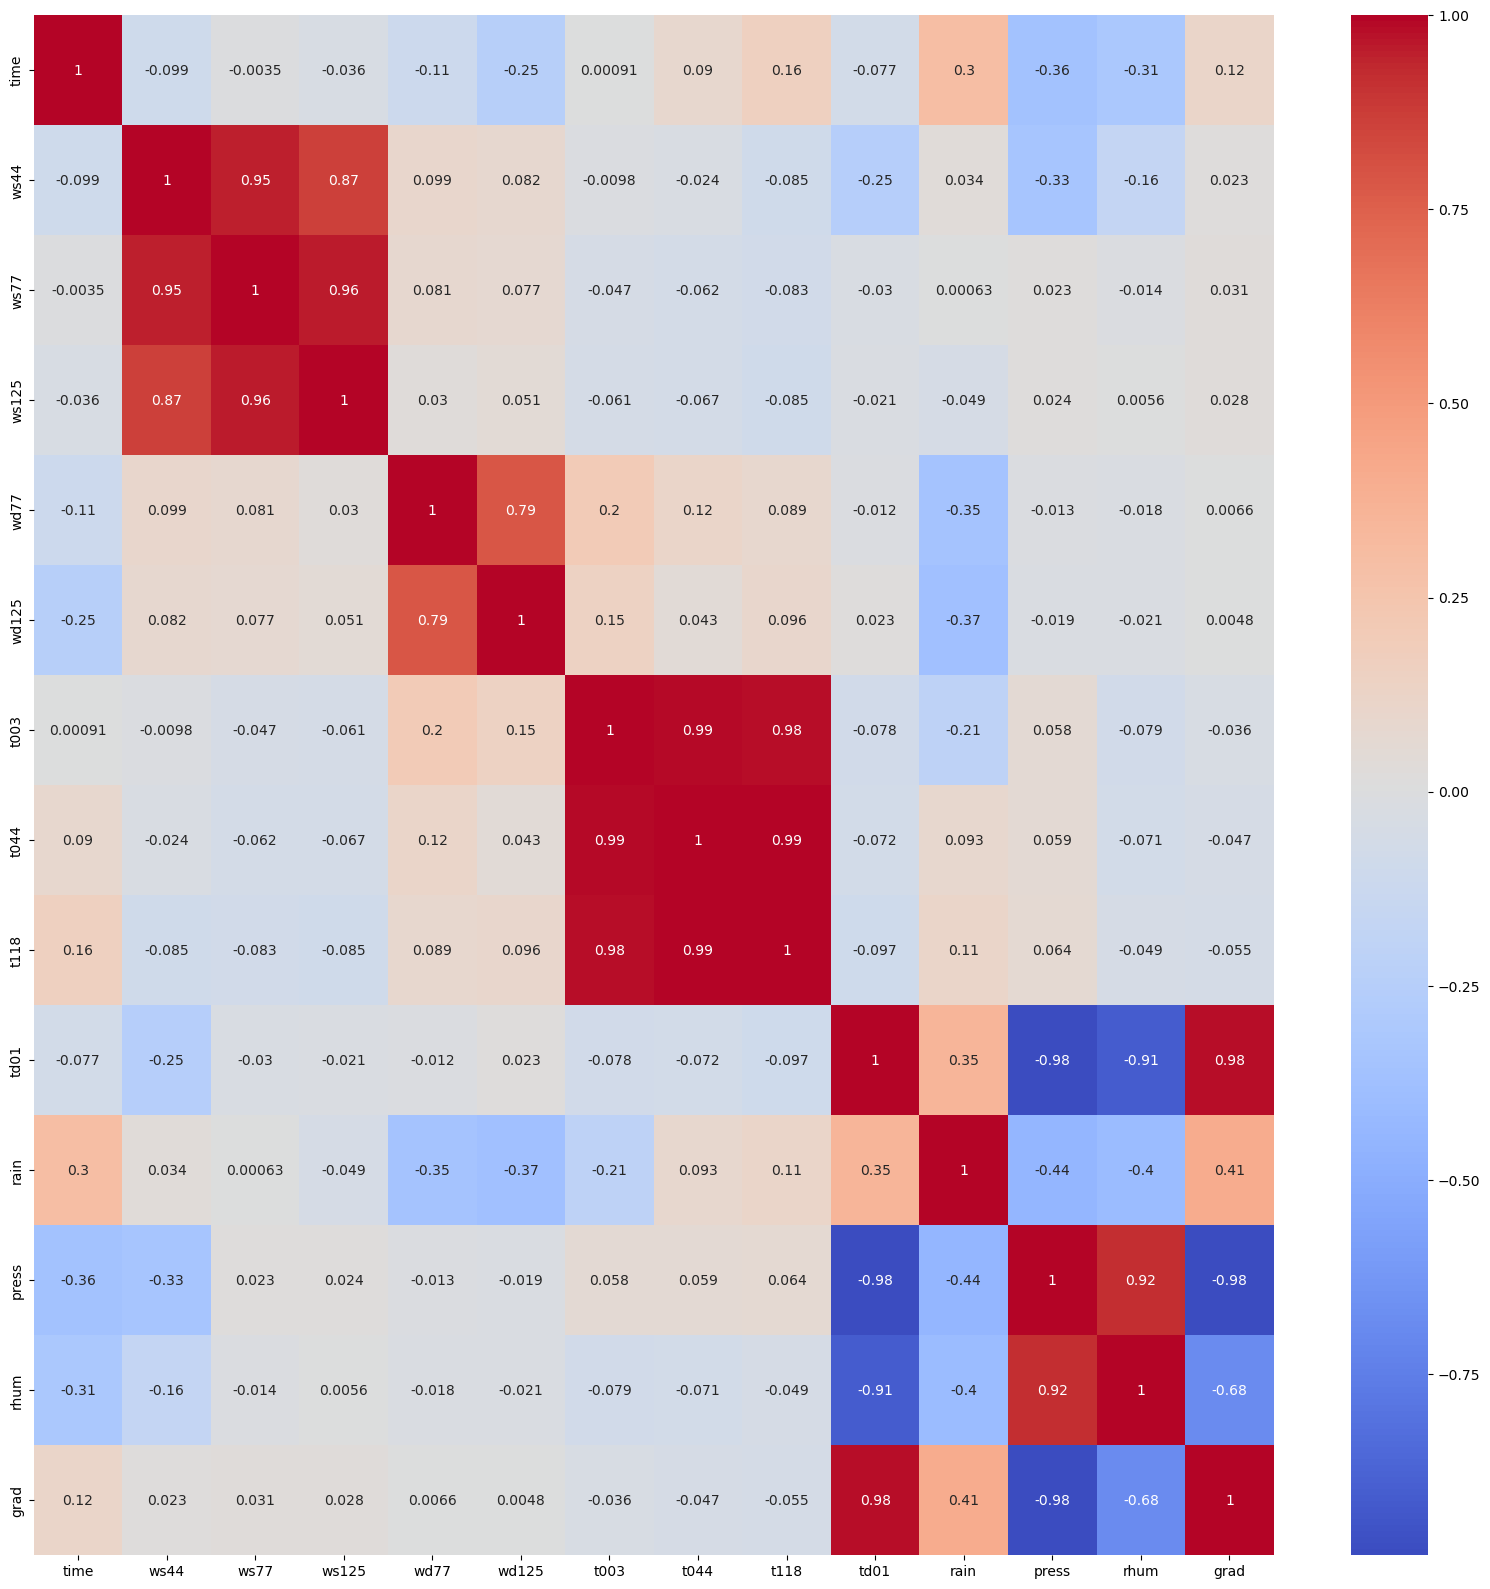

In [15]:
corr_matrix = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show() # pressure is highly correlated with humidity, grad and td01

In [16]:
#drop all columns not related to wind speed and direction
df = df.drop(columns=['t044', 'rain', 'press', 'rhum', 'grad', 't003', 't118', 'td01'])
#they have a lot of NaN values. Still having them as separate code snippet in case we need them later

In [17]:
# Converting time values to timestamp strings
from datetime import datetime, timedelta
base_date_risoe = datetime(1995, 11, 20, 16, 25, 0)

time_minutes = np.array(df['time'])
time = []
for minutes in time_minutes:
	time_delta = timedelta(minutes=int(minutes))
	timestamp = base_date_risoe + time_delta
	time.append(timestamp.strftime('%Y-%m-%d %H:%M:%S'))
df['timestamp'] = time

#moving timestamp to first column
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

#removing time column
df = df.drop(columns=['time'])

#using timestamp to develop "season" category column for further analysis
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['season'] = df['timestamp'].dt.month
df['season'] = df['season'].replace([1,2,3,4,5,6,7,8,9,10,11,12],[1,1,2,2,2,3,3,3,4,4,4,1])

#moving season to first column
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

pd.set_option('display.max_columns', None)
df

,season,timestamp,ws44,ws77,ws125,wd77,wd125
0,4,1995-11-20 16:25:00,NaN,3.36,3.04,205.0,208.0
1,4,1995-11-20 16:35:00,NaN,3.05,3.17,205.0,214.0
2,4,1995-11-20 16:45:00,NaN,3.59,3.64,204.0,209.0
3,4,1995-11-20 16:55:00,NaN,3.87,3.77,202.0,209.0
4,4,1995-11-20 17:05:00,NaN,4.74,4.28,201.0,212.0
...,...,...,...,...,...,...,...
628354,1,2007-12-31 23:16:00,6.11,6.04,NaN,0.0,0.0
628355,1,2007-12-31 23:26:00,7.08,6.97,NaN,0.0,0.0
628356,1,2007-12-31 23:36:00,8.39,8.17,NaN,0.0,0.0
628357,1,2007-12-31 23:46:00,6.79,6.66,NaN,0.0,0.0


In [18]:
#showing amount of rows in all ws columns grouped by season
print('ws44:', df.groupby('season')['ws44'].count())
print('\nws77:', df.groupby('season')['ws77'].count())
print('\nws125:', df.groupby('season')['ws125'].count())
# out of existing - ws77 seems to have the most data

ws44: season
1    117078
2    116247
3    126201
4    121292
Name: ws44, dtype: int64

ws77: season
1    149620
2    157746
3    157938
4    156303
Name: ws77, dtype: int64

ws125: season
1    127997
2    129813
3    142994
4    140901
Name: ws125, dtype: int64


In [19]:
#showing amount of rows in all wd columns grouped by season
print('wd77:', df.groupby('season')['wd77'].count())
print('\nwd125:', df.groupby('season')['wd125'].count())
# out of existing - wd77 seems to have the most data

wd77: season
1    155624
2    157959
3    157983
4    156245
Name: wd77, dtype: int64

wd125: season
1    134105
2    130844
3    149005
4    144876
Name: wd125, dtype: int64


Because of the above values in both ws and wd column - we decided to proceed with altitude 77, as it has the most data (by seasons)

In [20]:
#dropping columns of wind speeds and wind directions except for 77
df = df.drop(columns=['ws44', 'ws125', 'wd125'])

In [21]:
#removing negative values in ws column
df = df[df['ws77'] >= 0]

#keeping values only from 0 to 359 in wd column
df = df[df['wd77'] >= 0] 
df = df[df['wd77'] < 360] 

# 628359 -> 620780  rows

In [22]:
#now we can drop all NaN values, as other removed columns NaN's won't affect the columns left with existing data
df = df.dropna()

In [23]:
meso_df = pd.read_csv('meso_Risoe.csv')
meso_df

,TIMESTAMP,HGT,RHO060,RHO080,RHO100,RHO120,RHO140,RHO160,RHO180,RHO200,RHO220,TC060,TC080,TC100,TC120,TC140,TC160,TC180,TC200,TC220,WSP060,WSP080,WSP100,WSP120,WSP140,WSP160,WSP180,WSP200,WSP220,WDIR060,WDIR080,WDIR100,WDIR120,WDIR140,WDIR160,WDIR180,WDIR200,WDIR220,PRS060,PRS080,PRS100,PRS120,PRS140,PRS160,PRS180,PRS200,PRS220,TK060,TK080,TK100,TK120,TK140,TK160,TK180,TK200,TK220,TKE_PBL060,TKE_PBL080,TKE_PBL100,TKE_PBL120,TKE_PBL140,TKE_PBL160,TKE_PBL180,TKE_PBL200,TKE_PBL220,RH060,RH080,RH100,RH120,RH140,RH160,RH180,RH200,RH220
0,2001-06-10 15:00:00,7.770000,1.234208,1.232239,1.230234,1.228201,1.226122,1.224005,1.221824,1.219543,1.217271,10.930863,10.711609,10.500029,10.295079,10.102303,9.920068,9.752909,9.608748,9.462971,1.71,1.77,1.82,1.88,1.95,2.02,2.12,2.23,2.35,92.76,94.47,96.71,99.34,102.54,106.13,110.31,115.34,119.83,100650.46,100412.27,100174.25,99936.39,99699.44,99463.28,99227.33,98991.72,98756.26,284.09,283.87,283.66,283.46,283.26,283.08,282.91,282.77,282.62,0.20,0.20,0.17,0.12,0.10,0.10,0.10,0.10,0.10,69.34,69.59,69.78,69.91,69.88,69.70,69.36,68.77,68.25
1,2001-06-10 16:00:00,7.770000,1.230668,1.228701,1.226703,1.224679,1.222648,1.220613,1.218572,1.216524,1.214477,11.490860,11.271607,11.060035,10.855100,10.652303,10.451358,10.252139,10.055555,9.859033,0.32,0.38,0.43,0.48,0.53,0.58,0.63,0.70,0.76,153.00,158.45,162.63,166.00,168.85,171.30,173.44,175.35,176.98,100559.55,100321.49,100083.89,99846.67,99609.99,99373.76,99137.93,98902.73,98667.64,284.65,284.43,284.22,284.02,283.81,283.61,283.41,283.22,283.02,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,63.85,64.41,64.98,65.55,66.13,66.71,67.30,67.89,68.49
2,2001-06-10 17:00:00,7.770000,1.230054,1.228041,1.226011,1.223966,1.221926,1.219891,1.217852,1.215805,1.213756,11.605221,11.396657,11.192716,10.992769,10.792295,10.591364,10.392149,10.195551,9.999454,0.92,0.93,0.93,0.93,0.93,0.92,0.92,0.91,0.91,314.87,313.49,312.13,310.79,309.37,307.87,306.32,304.70,303.05,100549.80,100311.73,100074.14,99836.94,99600.27,99364.05,99128.24,98893.07,98658.03,284.77,284.56,284.35,284.15,283.95,283.75,283.55,283.36,283.16,0.10,0.10,0.13,0.18,0.20,0.20,0.18,0.14,0.10,63.23,63.78,64.35,64.95,65.57,66.21,66.84,67.49,68.13
3,2001-06-10 18:00:00,7.770000,1.229966,1.227930,1.225889,1.223844,1.221794,1.219739,1.217687,1.215639,1.213591,11.617383,11.414188,11.212728,11.012765,10.814791,10.618537,10.422147,10.225550,10.029453,1.54,1.60,1.64,1.67,1.68,1.69,1.69,1.68,1.67,356.94,357.14,357.29,357.42,357.55,357.67,357.79,357.88,357.98,100546.91,100308.84,100071.24,99834.04,99597.36,99361.12,99125.30,98890.10,98655.02,284.78,284.57,284.37,284.17,283.97,283.78,283.58,283.39,283.19,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,64.66,65.03,65.48,66.01,66.55,67.12,67.70,68.31,68.93
4,2001-06-10 19:00:00,7.770000,1.233801,1.231368,1.228940,1.226516,1.224150,1.221833,1.219564,1.217368,1.215178,10.744354,10.632043,10.518310,10.403348,10.277368,10.141850,9.995988,9.834347,9.671652,5.07,5.50,5.80,5.98,6.02,5.95,5.82,5.60,5.38,16.78,19.64,22.01,24.14,25.50,26.31,26.56,25.90,25.14,100551.14,100313.18,100075.27,99837.40,99600.53,99364.52,99128.94,98894.01,98659.19,283.90,283.79,283.68,283.56,283.44,283.30,283.16,282.99,282.83,0.30,0.30,0.25,0.15,0.10,0.10,0.10,0.10,0.10,65.39,64.26,63.19,62.19,61.58,61.29,61.45,62.27,63.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204283,2020-09-24 08:00:00,7.772932,1.197993,1.195880,1.193761,1.191636,1.189495,1.187339,1.185160,1.182938,1.180713,14.759896,14.588686,14.419608,14.252606,14.090060,13.932090,13.780087,13.639622,13.499828,8.65,9.30,9.87,10.36,10.84,11.29,11.74,12.22,12.69,214.25,214.93,215.58,216.21,216.89,217.60,218.36,219.23,220.04,99013.86,98780.47,98547.49,98314.91,98082.79,97851.14,97619.82,97389.15,97158.51,287

In [24]:
#dropping everything except 80, as it's closest to 77 altitude
meso_df = meso_df.loc[:, ['TIMESTAMP', 'WSP080', 'WDIR080']]

#converting meso timestamp to datetime
meso_df['TIMESTAMP'] = pd.to_datetime(meso_df['TIMESTAMP'])

meso_df

,TIMESTAMP,WSP080,WDIR080
0,2001-06-10 15:00:00,1.77,94.47
1,2001-06-10 16:00:00,0.38,158.45
2,2001-06-10 17:00:00,0.93,313.49
3,2001-06-10 18:00:00,1.60,357.14
4,2001-06-10 19:00:00,5.50,19.64
...,...,...,...
204283,2020-09-24 08:00:00,9.30,214.93
204284,2020-09-24 09:00:00,9.47,213.96
204285,2020-09-24 10:00:00,8.84,229.81
204286,2020-09-24 11:00:00,8.82,232.81


In [25]:
# time conversion DK (including summer time which can be tracked by date) -> UTC for mast data
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = df['timestamp'].apply(lambda x: x - timedelta(hours=2) if x.month < 11 and x.month > 3 else x - timedelta(hours=1))

In [26]:
#resampling
import math

temp_df = df.loc[:, ['timestamp', 'ws77', 'wd77', 'season']]
temp_df = temp_df.set_index('timestamp')

# Resampling 'ws77' using mean
resampled_ws77 = temp_df['ws77'].resample('1H').mean()

# Custom aggregation function for 'wd77' resampling
def circular_mean(values):
    radians = [val * (2 * math.pi / 360) for val in values]
    sines = [sum([math.sin(rad) for rad in radians])]
    cosines = [sum([math.cos(rad) for rad in radians])]
    mean_rad = math.atan2(sines[0], cosines[0])
    mean_deg = mean_rad * (360 / (2 * math.pi))
    return mean_deg if mean_deg >= 0 else mean_deg + 360

# Resampling 'wd77' using the custom aggregation function
resampled_wd77 = temp_df['wd77'].resample('1H').apply(circular_mean)

# Resampling 'season'
resampled_season = temp_df['season'].resample('1H').max()

# Creating a new dataframe with resampled values
resampled_df = pd.DataFrame({'ws77': resampled_ws77, 'wd77': resampled_wd77, 'season': resampled_season})

# Dropping NaN values
resampled_df = resampled_df.dropna()

resampled_df

,ws77,wd77,season
timestamp,,,
1995-11-20 15:00:00,3.467500,204.000076,4.0
1995-11-20 16:00:00,5.216667,201.003152,4.0
1995-11-20 17:00:00,6.288333,202.833228,4.0
1995-11-20 18:00:00,7.316667,200.166908,4.0
1995-11-20 19:00:00,7.943333,197.500508,4.0
...,...,...,...
2007-12-31 18:00:00,6.366667,0.000000,1.0
2007-12-31 19:00:00,8.723333,0.000000,1.0
2007-12-31 20:00:00,8.430000,0.000000,1.0


In [27]:
#rounding mast data timestamp to match meso data timestamp in another way
df['timestamp'] = df['timestamp'].dt.round('H')
df

,season,timestamp,ws77,wd77
0,4,1995-11-20 15:00:00,3.36,205.0
1,4,1995-11-20 16:00:00,3.05,205.0
2,4,1995-11-20 16:00:00,3.59,204.0
3,4,1995-11-20 16:00:00,3.87,202.0
4,4,1995-11-20 16:00:00,4.74,201.0
...,...,...,...,...
628354,1,2007-12-31 22:00:00,6.04,0.0
628355,1,2007-12-31 22:00:00,6.97,0.0
628356,1,2007-12-31 23:00:00,8.17,0.0
628357,1,2007-12-31 23:00:00,6.66,0.0


In [28]:
#time frame of meso data
print('Meso Start:', meso_df['TIMESTAMP'].min())
print('Meso End:', meso_df['TIMESTAMP'].max())

#time frame of mast data
print('Mast Start:', df['timestamp'].min())
print('Mast End:', df['timestamp'].max())

Meso Start: 2000-01-01 07:00:00
Meso End: 2023-06-11 06:00:00
Mast Start: 1995-11-20 15:00:00
Mast End: 2007-12-31 23:00:00


In [29]:
#we need to limit the time frame of meso data to match the mast data and vice veras
meso_df = meso_df[(meso_df['TIMESTAMP'] >= '2000-01-01 07:00:00') & (meso_df['TIMESTAMP'] <= '2007-12-31 23:00:00')]
df = df[(df['timestamp'] >= '2000-01-01 07:00:00') & (df['timestamp'] <= '2007-12-31 23:00:00')]
resampled_df = resampled_df[(resampled_df.index >= '2000-01-01 07:00:00') & (resampled_df.index <= '2007-12-31 23:00:00')]

In [30]:
#join meso data with risoe data on timestamp column from meso_df
df = df.join(meso_df.set_index('TIMESTAMP'), on='timestamp')

#dropping some NaN values
df = df.dropna()

df

,season,timestamp,ws77,wd77,WSP080,WDIR080
216376,1,2000-01-01 07:00:00,6.86,188.0,5.83,209.09
216377,1,2000-01-01 07:00:00,6.89,190.0,5.83,209.09
216378,1,2000-01-01 07:00:00,6.16,187.0,5.83,209.09
216379,1,2000-01-01 07:00:00,6.19,189.0,5.83,209.09
216380,1,2000-01-01 07:00:00,6.32,176.0,5.83,209.09
...,...,...,...,...,...,...
628354,1,2007-12-31 22:00:00,6.04,0.0,6.90,9.16
628355,1,2007-12-31 22:00:00,6.97,0.0,6.90,9.16
628356,1,2007-12-31 23:00:00,8.17,0.0,6.59,9.42
628357,1,2007-12-31 23:00:00,6.66,0.0,6.59,9.42


In [31]:
resampled_df = resampled_df.join(meso_df.set_index('TIMESTAMP'), on='timestamp')

resampled_df = resampled_df.dropna()

resampled_df

,ws77,wd77,season,WSP080,WDIR080
timestamp,,,,,
2000-01-01 07:00:00,6.573333,183.502033,1.0,5.83,209.09
2000-01-01 08:00:00,6.203333,194.212940,1.0,6.13,204.21
2000-01-01 09:00:00,6.701667,201.995414,1.0,6.69,204.75
2000-01-01 10:00:00,7.120000,196.499314,1.0,6.37,211.50
2000-01-01 11:00:00,6.541667,201.003968,1.0,6.20,217.37
...,...,...,...,...,...
2007-12-31 18:00:00,6.366667,0.000000,1.0,6.43,11.71
2007-12-31 19:00:00,8.723333,0.000000,1.0,5.18,12.00
2007-12-31 20:00:00,8.430000,0.000000,1.0,4.98,6.64


In [32]:
#outliers for ws77 - 6222 outliers. 1.53% of data, not sifginificant amount - can keep
print(df['ws77'].describe()) #manually checking one column for outliers

q1 = df['ws77'].quantile(0.25)
q3 = df['ws77'].quantile(0.75)
iqr = q3 - q1
print('\nQ1: ', q1)
print('Q3: ', q3)
print('IQR: ', iqr)
# calculate the number of values outside [Q1 - 1.5IQR ; Q3 + 1.5IQR]
print('\nAmount of outliers:', df['ws77'].apply(lambda x: x < (q1 - 1.5 * iqr) or x > (q3 + 1.5 * iqr)).sum())

# values of not outliers
print('Amount of values that are not outliers:', df['ws77'].apply(lambda x: x > (q1 - 1.5 * iqr) and x < (q3 + 1.5 * iqr)).sum())

# percentage of outliers
print('Percentage of outliers:',  df['ws77'].apply(lambda x: x < (q1 - 1.5 * iqr) or x > (q3 + 1.5 * iqr)).sum()/len(df)*100)

count    405126.000000
mean          6.866178
std           3.265311
min           0.000000
25%           4.550000
50%           6.600000
75%           8.780000
max          29.960000
Name: ws77, dtype: float64

Q1:  4.55
Q3:  8.78
IQR:  4.2299999999999995

Amount of outliers: 6222
Amount of values that are not outliers: 398904
Percentage of outliers: 1.5358184861006206


In [33]:
#outliers for resampled ws77 - 1045 outliers. 1.53% of data, not sifginificant amount - can keep
print(resampled_df['ws77'].describe()) #manually checking one column for outliers

q1 = resampled_df['ws77'].quantile(0.25)
q3 = resampled_df['ws77'].quantile(0.75)
iqr = q3 - q1
print('\nQ1: ', q1)
print('Q3: ', q3)
print('IQR: ', iqr)
# calculate the number of values outside [Q1 - 1.5IQR ; Q3 + 1.5IQR]
print('\nAmount of outliers:', resampled_df['ws77'].apply(lambda x: x < (q1 - 1.5 * iqr) or x > (q3 + 1.5 * iqr)).sum())

# values of not outliers
print('Amount of values that are not outliers:', resampled_df['ws77'].apply(lambda x: x > (q1 - 1.5 * iqr) and x < (q3 + 1.5 * iqr)).sum())

# percentage of outliers
print('Percentage of outliers:',  resampled_df['ws77'].apply(lambda x: x < (q1 - 1.5 * iqr) or x > (q3 + 1.5 * iqr)).sum()/len(resampled_df)*100)

count    67641.000000
mean         6.861883
std          3.219918
min          0.130000
25%          4.585000
50%          6.595000
75%          8.748333
max         28.178333
Name: ws77, dtype: float64

Q1:  4.585
Q3:  8.748333333333333
IQR:  4.163333333333333

Amount of outliers: 1045
Amount of values that are not outliers: 66596
Percentage of outliers: 1.5449209798790675


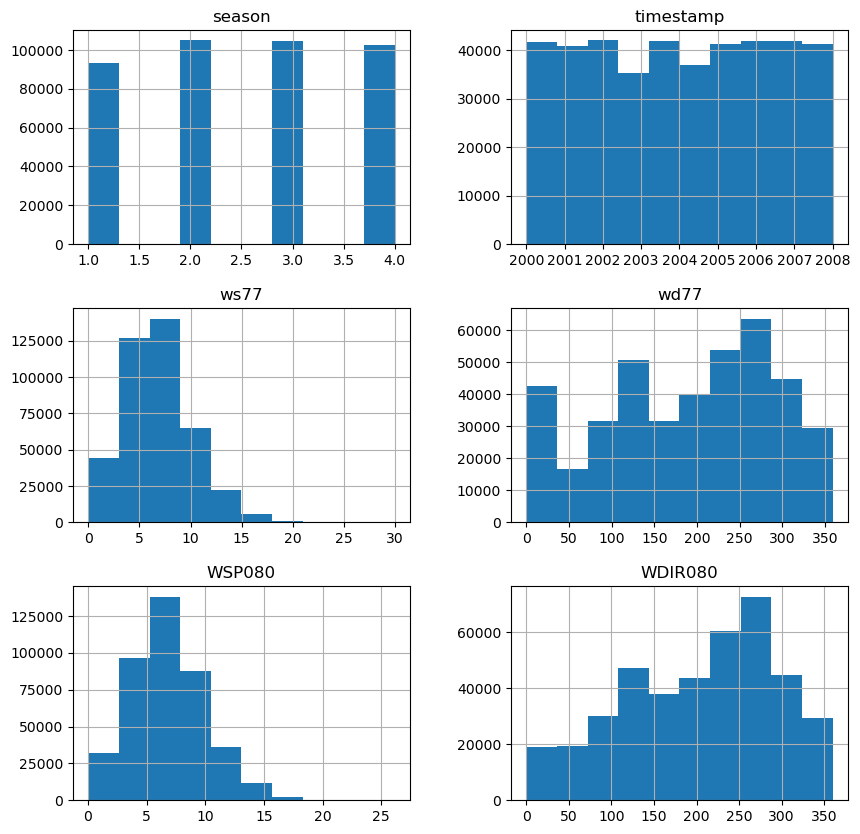

In [34]:
#Normalisation of original data
df.hist(figsize=(10,10))
plt.show()

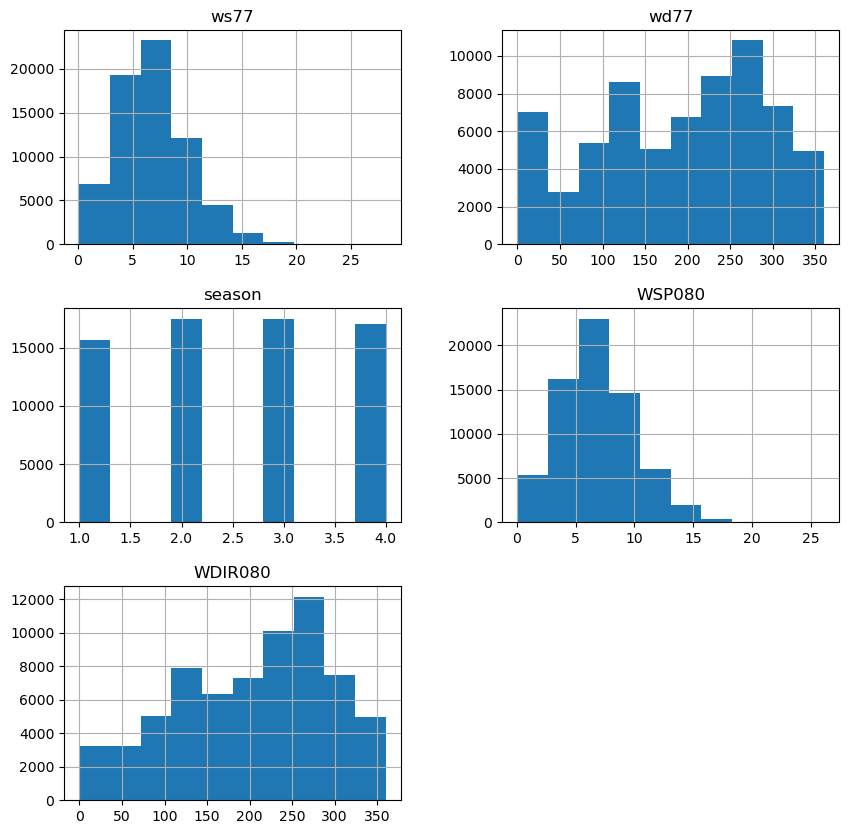

In [35]:
#Normalisation of resampled data
resampled_df.hist(figsize=(10,10))
plt.show()

#### Model development

In [36]:
X = resampled_df.drop(['ws77', 'wd77'], axis=1)  # Features (all columns except ws77 and wd77)
y = resampled_df[['ws77', 'wd77']]  # Target (2D array for multi-output regression)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['season'])

##### Linear Regression

In [37]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

# R^2 and MSE for train set
y_pred_train_linear = model_linear.predict(X_train)
r2_train_linear_ws77 = r2_score(y_train.iloc[:, 0], y_pred_train_linear[:, 0])
r2_train_linear_wd77 = r2_score(y_train.iloc[:, 1], y_pred_train_linear[:, 1])
mse_train_linear_ws77 = mean_squared_error(y_train.iloc[:, 0], y_pred_train_linear[:, 0])
mse_train_linear_wd77 = mean_squared_error(y_train.iloc[:, 1], y_pred_train_linear[:, 1])

# R^2 and MSE for test set
y_pred_linear = model_linear.predict(X_test)
r2_linear_ws77 = r2_score(y_test.iloc[:, 0], y_pred_linear[:, 0])
r2_linear_wd77 = r2_score(y_test.iloc[:, 1], y_pred_linear[:, 1])
mse_linear_ws77 = mean_squared_error(y_test.iloc[:, 0], y_pred_linear[:, 0])
mse_linear_wd77 = mean_squared_error(y_test.iloc[:, 1], y_pred_linear[:, 1])

# Print results for linear regression
print("Linear Regression:")
print("- R^2 (train) ws77:", r2_train_linear_ws77)
print("- R^2 (train) wd77:", r2_train_linear_wd77)
print("- R^2 (test) ws77:", r2_linear_ws77)
print("- R^2 (test) wd77:", r2_linear_wd77)
print("- MSE (train) ws77:", mse_train_linear_ws77)
print("- MSE (train) wd77:", mse_train_linear_wd77)
print("- MSE (test) ws77:", mse_linear_ws77)
print("- MSE (test) wd77:", mse_linear_wd77)

Linear Regression:
- R^2 (train) ws77: 0.7308810397393817
- R^2 (train) wd77: 0.37435282803195224
- R^2 (test) ws77: 0.7170543304402042
- R^2 (test) wd77: 0.3593356324316227
- MSE (train) ws77: 2.8069701396713915
- MSE (train) wd77: 6267.782315250159
- MSE (test) ws77: 2.8625967669695567
- MSE (test) wd77: 6500.602858326252


##### Polynomial Regression

In [38]:
# Define the degree of the polynomial (adjust as needed)
degree = 2

# Create the polynomial features transformer
poly = PolynomialFeatures(degree=degree)

# Transform training data
X_train_poly = poly.fit_transform(X_train)

# Define and train the linear regression model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Transform test data (ensure consistency with training data)
X_test_poly = poly.transform(X_test)

# Calculate R-squared and MSE for train set (assuming y_train has multiple targets)
y_pred_train_poly = model_poly.predict(X_train_poly)
r2_train_poly_ws77 = r2_score(y_train.iloc[:, 0], y_pred_train_poly[:, 0])
r2_train_poly_wd77 = r2_score(y_train.iloc[:, 1], y_pred_train_poly[:, 1])
mse_train_poly_ws77 = mean_squared_error(y_train.iloc[:, 0], y_pred_train_poly[:, 0])
mse_train_poly_wd77 = mean_squared_error(y_train.iloc[:, 1], y_pred_train_poly[:, 1])

# Calculate R-squared and MSE for test set (assuming y_test has multiple targets)
y_pred_poly = model_poly.predict(X_test_poly)
r2_test_poly_ws77 = r2_score(y_test.iloc[:, 0], y_pred_poly[:, 0])
r2_test_poly_wd77 = r2_score(y_test.iloc[:, 1], y_pred_poly[:, 1])
mse_test_poly_ws77 = mean_squared_error(y_test.iloc[:, 0], y_pred_poly[:, 0])
mse_test_poly_wd77 = mean_squared_error(y_test.iloc[:, 1], y_pred_poly[:, 1])

# Print results for Polynomial Regression
print("Polynomial Regression:")
print("- R^2 (train) ws77:", r2_train_poly_ws77)
print("- R^2 (train) wd77:", r2_train_poly_wd77)
print("- R^2 (test) ws77:", r2_test_poly_ws77)
print("- R^2 (test) wd77:", r2_test_poly_wd77)
print("- MSE (train) ws77:", mse_train_poly_ws77)
print("- MSE (train) wd77:", mse_train_poly_wd77)
print("- MSE (test) ws77:", mse_test_poly_ws77)
print("- MSE (test) wd77:", mse_test_poly_wd77)

Polynomial Regression:
- R^2 (train) ws77: 0.7385087173095046
- R^2 (train) wd77: 0.4093212205504385
- R^2 (test) ws77: 0.7262367215699017
- R^2 (test) wd77: 0.394046814029122
- MSE (train) ws77: 2.7274117794813777
- MSE (train) wd77: 5917.466223305469
- MSE (test) ws77: 2.7696973661700426
- MSE (test) wd77: 6148.4003358650625


#### Regularization
Now we try using Lasso and Ridge Regularization to reduce overfitting. During this Regularization we use cross-validation through a GridSearchCV to tune the hyperparameters of the Regularization, and find the optimal hyper parameters. 

##### Ridge Regression

In [39]:
# Define alpha values for cross-validation
alphas = 10**np.linspace(4,-2,100)*0.5

# Grid Search with cross-validation to find best alpha
model_ridge = Ridge()
grid_ridge = GridSearchCV(estimator=model_ridge, param_grid={'alpha': alphas}, scoring="neg_mean_squared_error", cv=5)
grid_ridge.fit(X_train, y_train)
print("Best estimator: {}".format(grid_ridge.best_estimator_))

# Best alpha value
best_alpha = grid_ridge.best_params_['alpha']

# Fit Ridge model with best alpha
model_ridge = Ridge(alpha=best_alpha)
model_ridge.fit(X_train, y_train)

# Calculate R-squared and MSE for train and test sets
y_pred_train_ridge = model_ridge.predict(X_train)
r2_train_ridge_ws77 = r2_score(y_train.iloc[:, 0], y_pred_train_ridge[:, 0])
r2_train_ridge_wd77 = r2_score(y_train.iloc[:, 1], y_pred_train_ridge[:, 1])
mse_train_ridge_ws77 = mean_squared_error(y_train.iloc[:, 0], y_pred_train_ridge[:, 0])
mse_train_ridge_wd77 = mean_squared_error(y_train.iloc[:, 1], y_pred_train_ridge[:, 1])

y_pred_ridge = model_ridge.predict(X_test)
r2_test_ridge_ws77 = r2_score(y_test.iloc[:, 0], y_pred_ridge[:, 0])
r2_test_ridge_wd77 = r2_score(y_test.iloc[:, 1], y_pred_ridge[:, 1])
mse_test_ridge_ws77 = mean_squared_error(y_test.iloc[:, 0], y_pred_ridge[:, 0])
mse_test_ridge_wd77 = mean_squared_error(y_test.iloc[:, 1], y_pred_ridge[:, 1])

# Print results for Ridge Regression
print("Ridge Regression (best alpha:", best_alpha, "):")
print("- R^2 (train) ws77:", r2_train_ridge_ws77)
print("- R^2 (train) wd77:", r2_train_ridge_wd77)
print("- R^2 (test) ws77:", r2_test_ridge_ws77)
print("- R^2 (test) wd77:", r2_test_ridge_wd77)
print("- MSE (train) ws77:", mse_train_ridge_ws77)
print("- MSE (train) wd77:", mse_train_ridge_wd77)
print("- MSE (test) ws77:", mse_test_ridge_ws77)
print("- MSE (test) wd77:", mse_test_ridge_wd77)

Best estimator: Ridge(alpha=115.50648500415791)
Ridge Regression (best alpha: 115.50648500415791 ):
- R^2 (train) ws77: 0.7308810041658442
- R^2 (train) wd77: 0.37435281095287554
- R^2 (test) ws77: 0.7170588639450768
- R^2 (test) wd77: 0.359336226224673
- MSE (train) ws77: 2.8069705107112375
- MSE (train) wd77: 6267.782486349685
- MSE (test) ws77: 2.862550900933113
- MSE (test) wd77: 6500.5968333106675


##### Lasso Regression

In [40]:
# Define alpha values for cross-validation
alphas = 10**np.linspace(4,-2,100)*0.5

# Grid Search with cross-validation to find best alpha
model_lasso = Lasso()
grid_lasso = GridSearchCV(estimator=model_lasso, param_grid={'alpha': alphas}, scoring="neg_mean_squared_error", cv=5)
grid_lasso.fit(X_train, y_train)
print("Best estimator: {}".format(grid_lasso.best_estimator_))

# Best alpha value
best_alpha = grid_lasso.best_params_['alpha']

# Fit Ridge model with best alpha
model_lasso = Lasso(alpha=best_alpha)
model_lasso.fit(X_train, y_train)

# Calculate R-squared and MSE for train and test sets
y_pred_train_lasso = model_lasso.predict(X_train)
r2_train_lasso_ws77 = r2_score(y_train.iloc[:, 0], y_pred_train_lasso[:, 0])
r2_train_lasso_wd77 = r2_score(y_train.iloc[:, 1], y_pred_train_lasso[:, 1])
mse_train_lasso_ws77 = mean_squared_error(y_train.iloc[:, 0], y_pred_train_lasso[:, 0])
mse_train_lasso_wd77 = mean_squared_error(y_train.iloc[:, 1], y_pred_train_lasso[:, 1])

y_pred_lasso = model_lasso.predict(X_test)
r2_test_lasso_ws77 = r2_score(y_test.iloc[:, 0], y_pred_lasso[:, 0])
r2_test_lasso_wd77 = r2_score(y_test.iloc[:, 1], y_pred_lasso[:, 1])
mse_test_lasso_ws77 = mean_squared_error(y_test.iloc[:, 0], y_pred_lasso[:, 0])
mse_test_lasso_wd77 = mean_squared_error(y_test.iloc[:, 1], y_pred_lasso[:, 1])

# Print results for Ridge Regression
print("Ridge Regression (best alpha:", best_alpha, "):")
print("- R^2 (train) ws77:", r2_train_lasso_ws77)
print("- R^2 (train) wd77:", r2_train_lasso_wd77)
print("- R^2 (test) ws77:", r2_test_lasso_ws77)
print("- R^2 (test) wd77:", r2_test_lasso_wd77)
print("- MSE (train) ws77:", mse_train_lasso_ws77)
print("- MSE (train) wd77:", mse_train_lasso_wd77)
print("- MSE (test) ws77:", mse_test_lasso_ws77)
print("- MSE (test) wd77:", mse_test_lasso_wd77)

Best estimator: Lasso(alpha=0.005)
Ridge Regression (best alpha: 0.005 ):
- R^2 (train) ws77: 0.7308789056890077
- R^2 (train) wd77: 0.3743528256035896
- R^2 (test) ws77: 0.7170611740877613
- R^2 (test) wd77: 0.35933595996641843
- MSE (train) ws77: 2.806992398287694
- MSE (train) wd77: 6267.782339577686
- MSE (test) ws77: 2.862527528930319
- MSE (test) wd77: 6500.599534942377


#### Conclusion on model development
From the model development we can conclude that the best model for the problem is probably polynomial regression. This makes sense as the wind data generally doesn't follow a linear development. We assessed the performance of the models by R^2 and MSE. From this we can determine that the polynomial model had the lowest MSE and the best R^2 value with the lowest amount of overfitting. We tried using Regularization, which reduced the overfitting of the linear regression a bit, but it still didn't perform better than the polynominal regression.
Looking at the R^2 and the MSE, we can also determine that the wind speed is the easiest to predict, while the wind direction has a much larger margin of error. For example for the Polynomial regression, the wind speed of the test set had an MSE of 2.7 while the wind direction had an MSE of 6148.